<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/CRVeff/SectorEff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Init

In [ ]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
!pip install uncertainties
from uncertainties import ufloat, unumpy

%pip -q install uproot3
%pip -q install --upgrade tables
import uproot3

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append(main_path+'root_files_dzhadan')
import math

!pip install fsspec
import dask.dataframe as dd

S = pow(100*100, 2) #100x100 m2 in cm2 - simulated area

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -I git+https://github.com/oksuzian/mu2etools.git
from mu2etools import utils, cuts

  Cloning https://github.com/oksuzian/mu2etools.git to /tmp/pip-req-build-0rnckgxr
  Running command git clone -q https://github.com/oksuzian/mu2etools.git /tmp/pip-req-build-0rnckgxr
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached charset_normalizer-2.0.10-py3-none-any.whl (39 kB)
  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Created wheel for mu2etools: filename=mu2etools-0.0.1-py3-none-any.whl size=5826 sha256=be7f9c5322c0a923f506762c21694871547452bc0682d8159a7b40b9c8d1973a
  Stored in directory: /tmp/pip-ephem-wheel-cache-hz4euowi/wheels/00/92/a8/d2a2c55928a20d8675652a7135b8880f1f4f9b655d8885d452
Successfully built mu2etools
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires reque

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 1.0
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

#Plot CRY4

In [ ]:
var_dict = utils.getVarList('all')

In [ ]:
for var in var_dict.keys():
  print(var)
  print(var_dict[var])

crvinfo__x
[-8000, 1000]
crvinfo__y
[0, 3500]
crvinfo__z
[-5000, 20000]
de_nhits
[-2, 100]
ue_nhits
[-2, 100]
dequal_TrkPID
[-1.1, 1.1]
dequal_TrkQual
[-0.1, 1.1]
deent_td
[0, 10]
deent_z0
[-500, 500]
deent_d0
[-500, 500]
deent_om
[-0.01, 0.05]
crvinfo__PEs
[-1, 1000]
crvinfo__dT
[-500, 500]
deent_mom
[50, 200]
deent_d0_om
[300, 1200]


In [ ]:
dfCRY4 = pd.read_hdf(main_path + "root_files_cry4/cry4df.h5")

try:
    dfCRY4
except NameError:
    dfCRY4 = pd.read_hdf(main_path + "root_files_cry4/cry4df.h5").query('(lyield==15000)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]


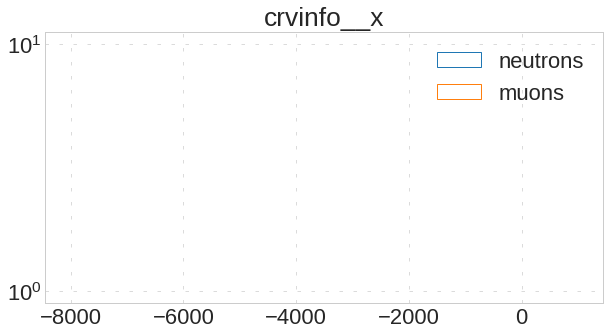

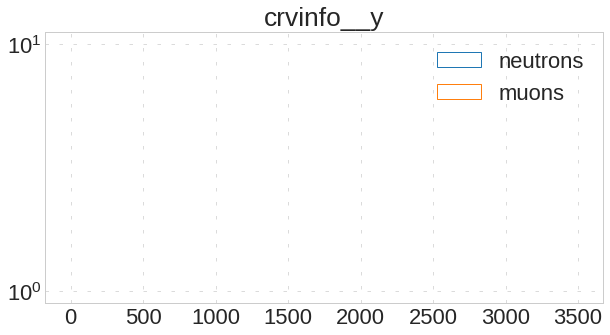

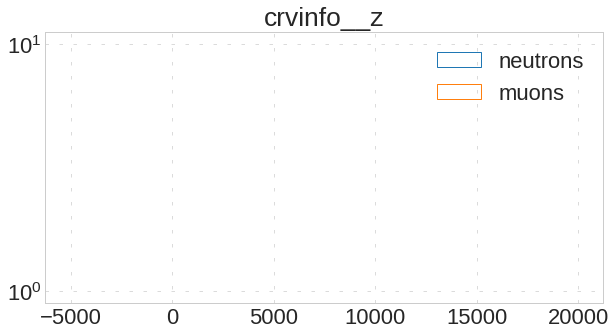

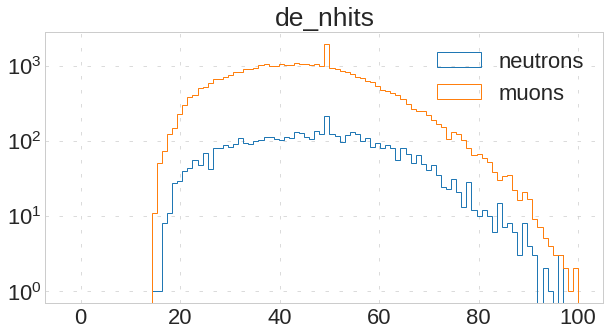

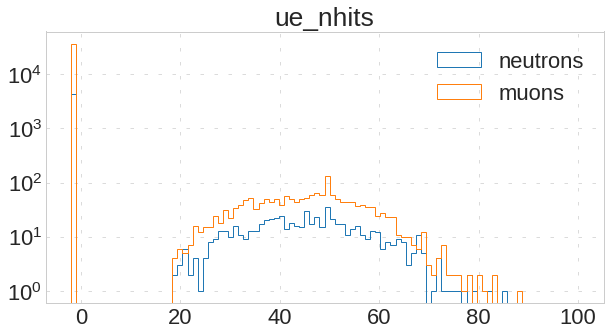

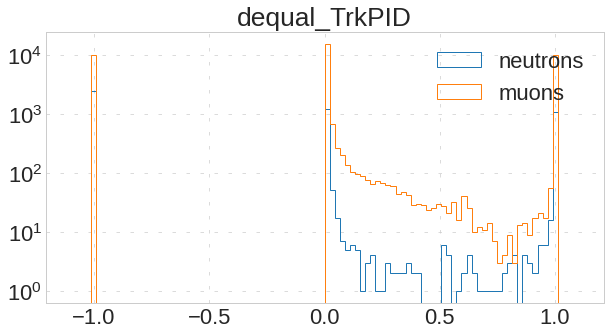

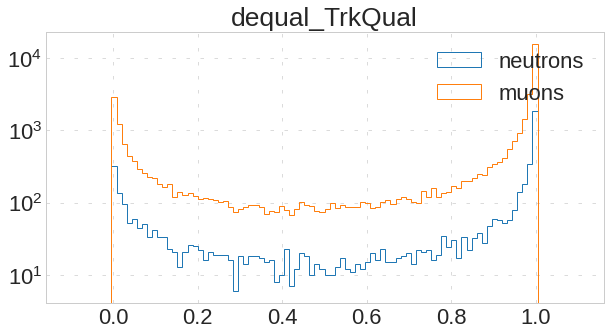

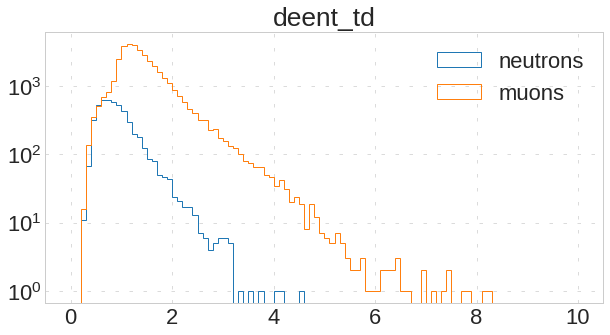

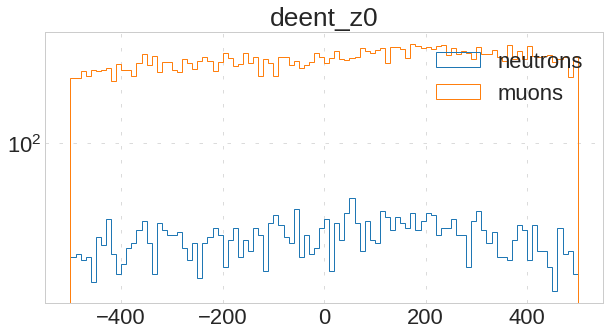

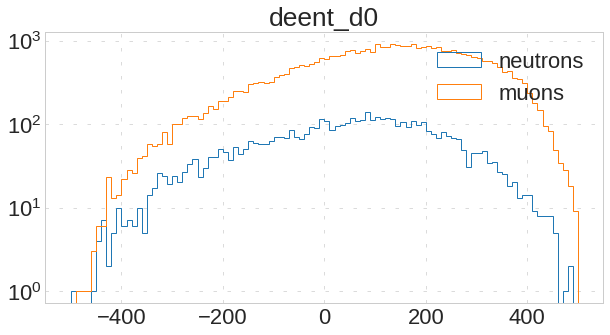

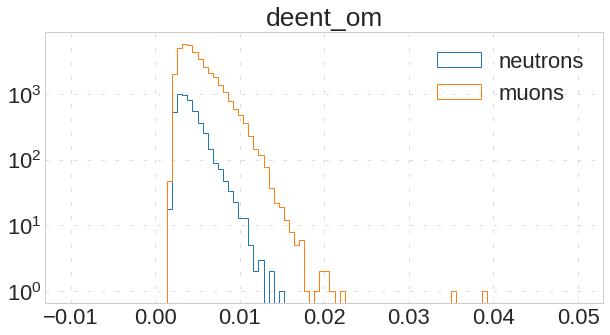

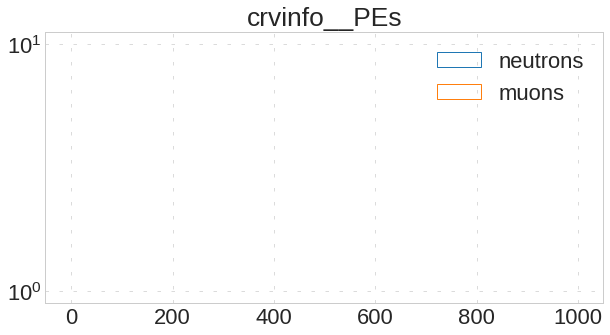

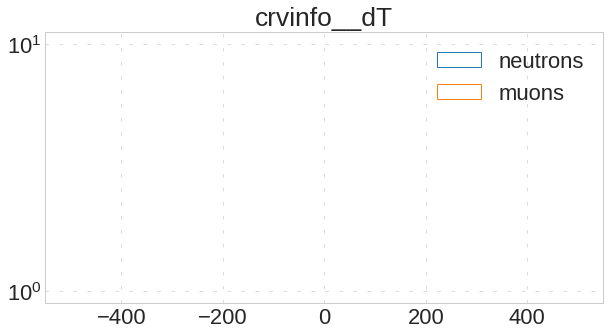

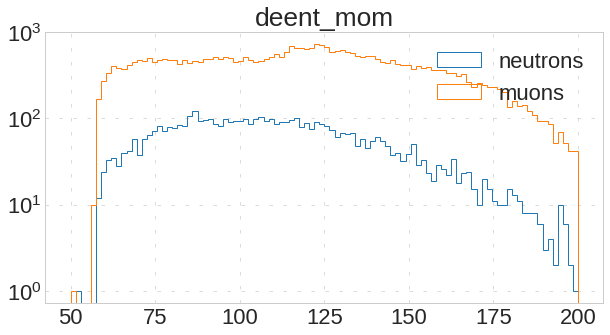

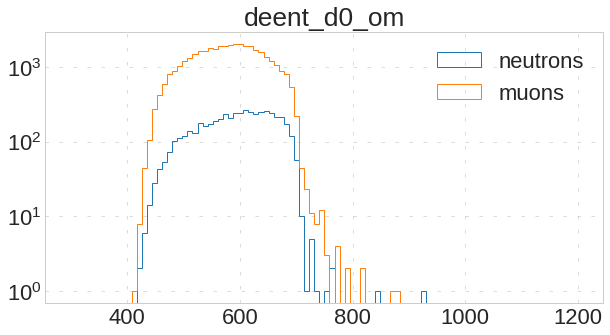

In [ ]:
for var in var_dict.keys():
  plt.figure()
  plt.title(var)
  plt.hist(dfCRY4.query('demcgen_pdg==2112  & crvinfo__timeWindowStart<0')[var], bins=100, range=var_dict[var], histtype='step', label='neutrons');
  plt.hist(dfCRY4.query('abs(demcgen_pdg)==13 & crvinfo__timeWindowStart<0')[var], bins=100, range=var_dict[var], histtype='step', label='muons');
  plt.yscale('log')
  plt.legend()


Text(0.5, 1.0, 'T3')

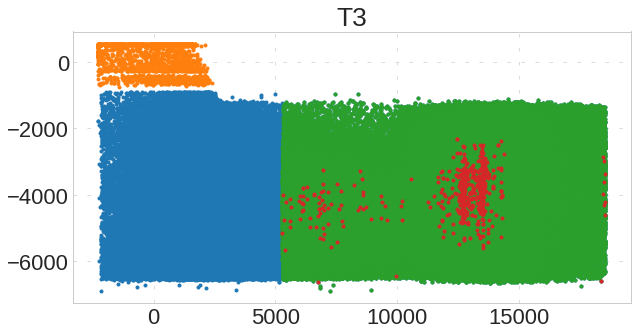

In [ ]:
dftmp = dfCRY4.query('_z>-80000 & abs(_pdgId)==13 & lyield==17000')
plt.plot(dftmp.query('_crvSectorType==3')._z, dftmp.query('_crvSectorType==3')._x, '.');
plt.plot(dftmp.query('_crvSectorType==4')._z, dftmp.query('_crvSectorType==4')._x, '.');

plt.plot(dftmp.query('_crvSectorNumber==10')._z, dftmp.query('_crvSectorNumber==10')._x, '.');
plt.plot(dftmp.query('_crvSectorNumber==10 & crvinfo__timeWindowStart<0')._z, dftmp.query('_crvSectorNumber==10 & crvinfo__timeWindowStart<0')._x, '.');
plt.title('T3')

Text(0.5, 1.0, 'T2')

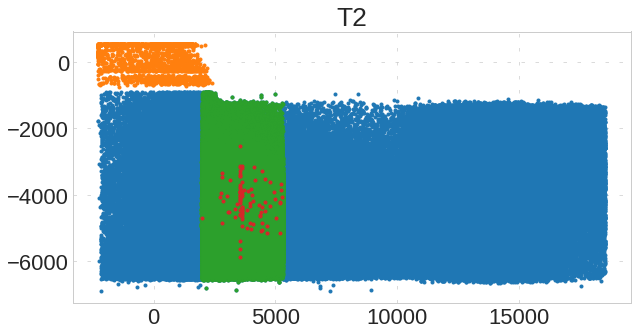

In [ ]:
plt.plot(dftmp.query('_crvSectorType==3')._z, dftmp.query('_crvSectorType==3')._x, '.');
plt.plot(dftmp.query('_crvSectorType==4')._z, dftmp.query('_crvSectorType==4')._x, '.');

plt.plot(dftmp.query('_crvSectorNumber==9')._z, dftmp.query('_crvSectorNumber==9')._x, '.', label='T3');
plt.plot(dftmp.query('_crvSectorNumber==9 & crvinfo__timeWindowStart<0')._z, dftmp.query('_crvSectorNumber==9 & crvinfo__timeWindowStart<0')._x, '.');
plt.title('T2')

Text(0.5, 1.0, 'T1')

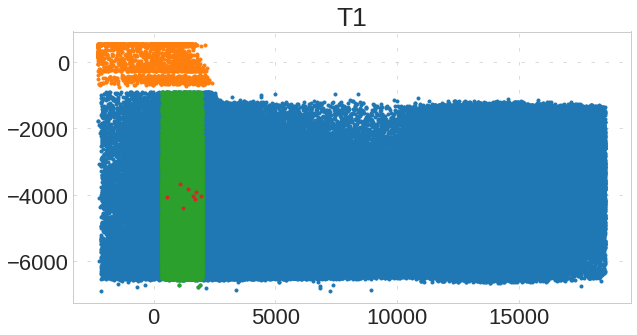

In [ ]:
plt.figure()
plt.plot(dftmp.query('_crvSectorType==3')._z, dftmp.query('_crvSectorType==3')._x, '.');
plt.plot(dftmp.query('_crvSectorType==4')._z, dftmp.query('_crvSectorType==4')._x, '.');
plt.plot(dftmp.query('_crvSectorNumber==8')._z, dftmp.query('_crvSectorNumber==8')._x, '.', label='T3');
plt.plot(dftmp.query('_crvSectorNumber==8 & crvinfo__timeWindowStart<0')._z, dftmp.query('_crvSectorNumber==8 & crvinfo__timeWindowStart<0')._x, '.');
plt.plot(dftmp.query(cuts.cut_pid_trkqual_ue+'& _crvSectorNumber==8 & crvinfo__timeWindowStart<0')._z, dftmp.query(cuts.cut_pid_trkqual_ue+'& _crvSectorNumber==8 & crvinfo__timeWindowStart<0')._x, 'o');
plt.title('T1')

In [ ]:
dftmp = dfCRY4.query('abs(_pdgId)==13')

secNumber=10

t1_noveto = len(dftmp.query('_crvSectorNumber==%d & crvinfo__timeWindowStart<0'%secNumber))
t1_all = len(dftmp.query('_crvSectorNumber==%d'%secNumber))

print('Non-vetoed events: %d, All events: %d, eff no cuts: %.2e'% (t1_noveto, t1_all, t1_noveto/t1_all))

t1_noveto = len(dftmp.query(cuts.cut_pid_trkqual_ue+'& _crvSectorNumber==%d & crvinfo__timeWindowStart<0'%secNumber))
t1_all = len(dftmp.query(cuts.cut_pid_trkqual_ue+'& _crvSectorNumber==%d'%secNumber))

print('Eff cuts: %.2e'% (t1_noveto/t1_all))

Non-vetoed events: 2051, All events: 1433733, eff no cuts: 1.43e-03
Eff cuts: 1.22e-03


In [ ]:

def getInefficiency(crvSectorNumber, cut):
  effave_arr=[]
  efferr_arr=[]
  lyield_arr=[]
  for lyield in range(7000, 17001, 2000):
    print(lyield)
    ave, err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& abs(_pdgId)==13 & lyield==%d & _crvSectorNumber==%d'%(lyield, crvSectorNumber), 1)
    print('Background all %.2f +/- %.2f' % (ave, err))

    non_veto, non_veto_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& abs(_pdgId)==13 & crvinfo__timeWindowStart<0 & lyield==%d & _crvSectorNumber==%d'%(lyield, crvSectorNumber), 1)
    print('Background all %.2f +/- %.2f' % (non_veto, non_veto_err))

    if ave==0:
      ave = 1
    print('Efficiency %.1e +/- %.2f' % (non_veto/ave, err))

    veto = ufloat(ave, math.sqrt(ave))
    unveto = ufloat(non_veto, math.sqrt(non_veto))
    effave_arr.append(unumpy.nominal_values(unveto/veto))
    efferr_arr.append(unumpy.std_devs(unveto/veto))
    lyield_arr.append(lyield*utils.LYIELD_SCALE)
  return lyield_arr, effave_arr, efferr_arr

7000
Background all 1881.40 +/- 33.88
Background all 2.08 +/- 0.90
Efficiency 1.1e-03 +/- 33.88
9000
Background all 1876.58 +/- 33.84
Background all 0.26 +/- 0.07
Efficiency 1.4e-04 +/- 33.84
11000
Background all 1886.74 +/- 33.94
Background all 0.09 +/- 0.04
Efficiency 4.9e-05 +/- 33.94
13000
Background all 1864.35 +/- 33.73
Background all 0.02 +/- 0.02
Efficiency 9.9e-06 +/- 33.73
15000
Background all 1852.32 +/- 33.62
Background all 0.04 +/- 0.03
Efficiency 2.0e-05 +/- 33.62
17000
Background all 1841.51 +/- 33.51
Background all 0.02 +/- 0.02
Efficiency 1.0e-05 +/- 33.51
7000
Background all 45423.56 +/- 164.99
Background all 94.25 +/- 6.23
Efficiency 2.1e-03 +/- 164.99
9000
Background all 45579.28 +/- 165.32
Background all 23.95 +/- 2.57
Efficiency 5.3e-04 +/- 165.32
11000
Background all 45425.75 +/- 165.04
Background all 13.09 +/- 1.34
Efficiency 2.9e-04 +/- 165.04
13000
Background all 45176.86 +/- 164.59
Background all 13.00 +/- 1.34
Efficiency 2.9e-04 +/- 164.59
15000
Background a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Background all 1.26 +/- 0.89
Background all 0.00 +/- 0.00
Efficiency 0.0e+00 +/- 0.89
9000
Background all 1.26 +/- 0.89
Background all 0.00 +/- 0.00
Efficiency 0.0e+00 +/- 0.89
11000
Background all 1.26 +/- 0.89
Background all 0.00 +/- 0.00
Efficiency 0.0e+00 +/- 0.89
13000
Background all 0.63 +/- 0.63
Background all 0.00 +/- 0.00
Efficiency 0.0e+00 +/- 0.63
15000
Background all 0.63 +/- 0.63
Background all 0.00 +/- 0.00
Efficiency 0.0e+00 +/- 0.63
17000
Background all 1.26 +/- 0.89
Background all 0.00 +/- 0.00
Efficiency 0.0e+00 +/- 0.89
7000
Background all 128.99 +/- 8.96
Background all 0.20 +/- 0.06
Efficiency 1.6e-03 +/- 8.96
9000
Background all 123.36 +/- 8.76
Background all 0.19 +/- 0.06
Efficiency 1.5e-03 +/- 8.76
11000
Background all 110.70 +/- 8.29
Background all 0.15 +/- 0.05
Efficiency 1.3e-03 +/- 8.29
13000
Background all 117.80 +/- 8.55
Background all 0.20 +/- 0.06
Efficiency 1.7e-03 +/- 8.55
15000
Background all 117.09 +/- 8.53
Background all 0.19 +/- 0.06
Efficiency 1.6e

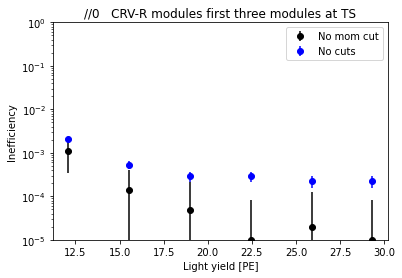

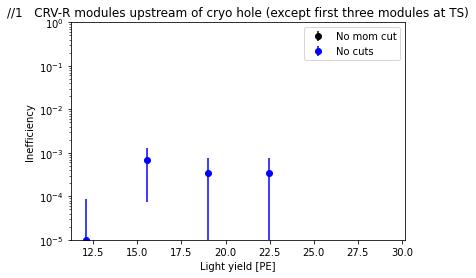

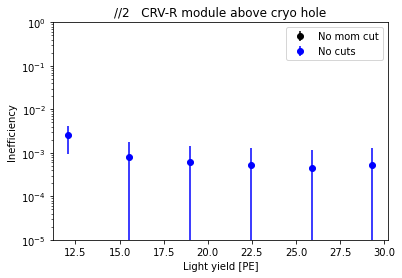

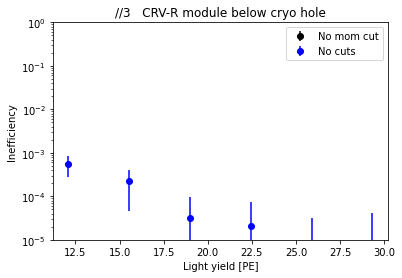

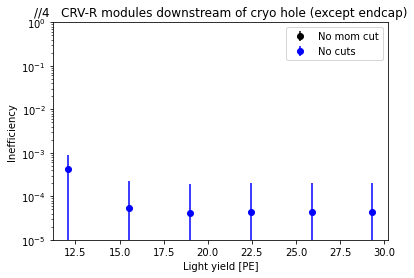

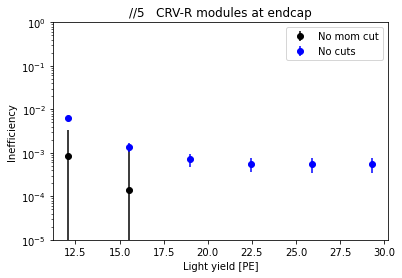

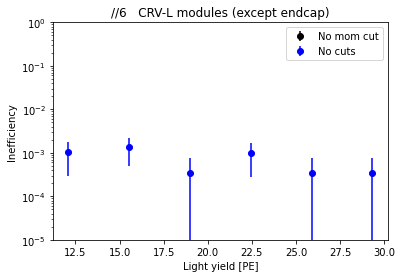

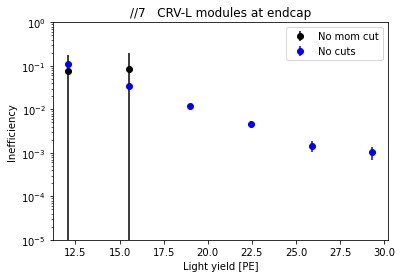

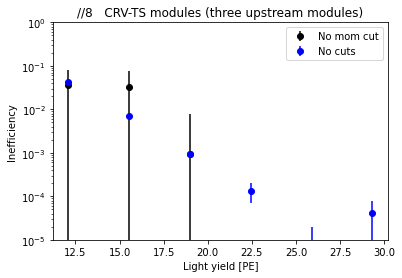

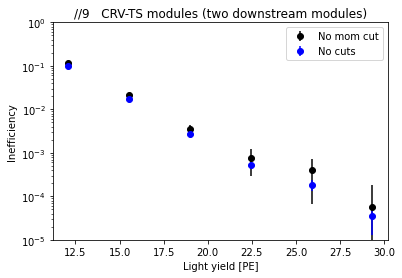

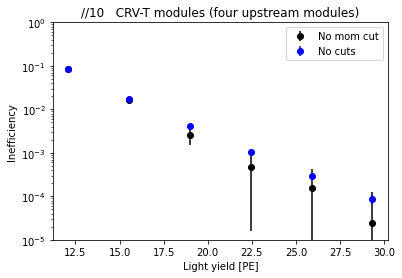

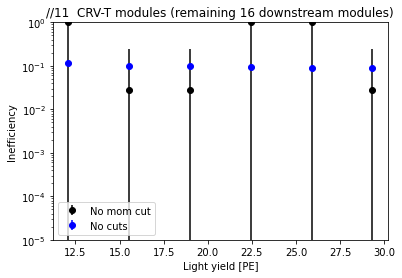

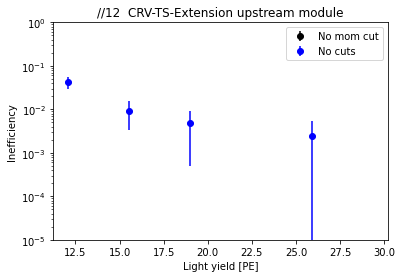

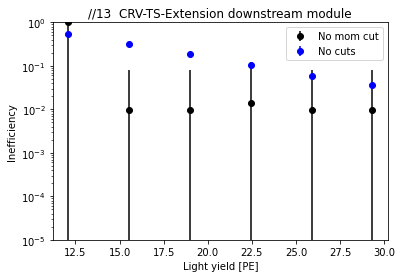

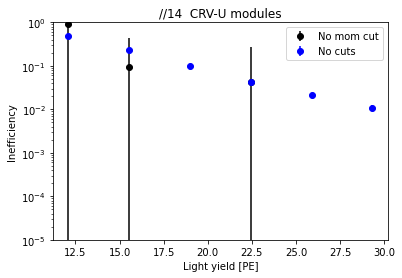

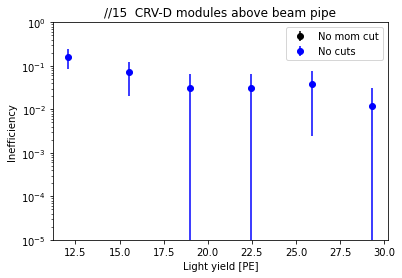

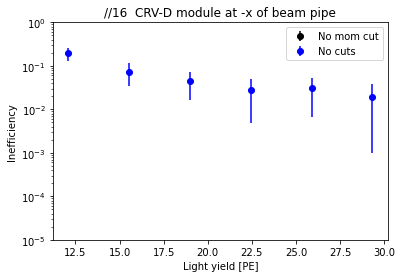

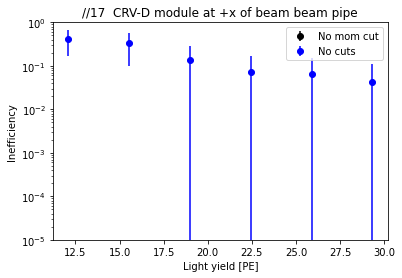

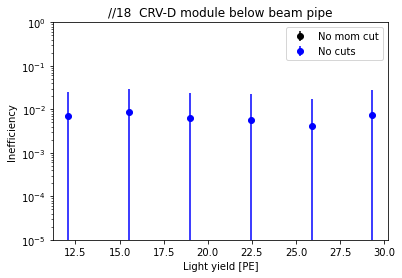

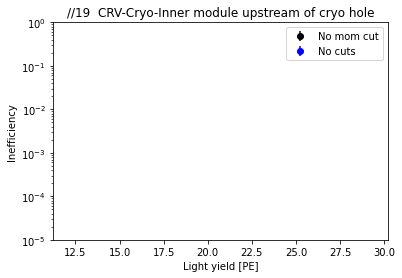

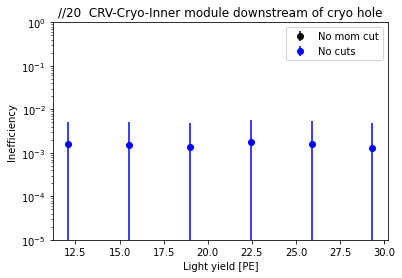

In [ ]:
dfIneff = pd.DataFrame()
crvSectorNames = list(utils.CRV_SECTOR_NAMES.keys())
for crvSectorNumber in range(0,21):
  crvSectorName = crvSectorNames[crvSectorNumber]
  plt.figure()
  lyield_arr, effave_arr, efferr_arr = getInefficiency(crvSectorNumber, cuts.cut_nomom)
  ineff_dict = {'lyield_arr':lyield_arr,
                'effave_arr':effave_arr,
                'efferr_arr':efferr_arr,
                }
  df_ = pd.DataFrame(ineff_dict)
  df_['crvSectorNumber']=crvSectorNumber
  df_['crvSectorName']=crvSectorName
  df_['cut']='No mom cut'

  dfIneff = dfIneff.append(df_, ignore_index = True)


  plt.errorbar(lyield_arr, effave_arr, yerr=efferr_arr, ls='None', color='Black', marker='o', label='No mom cut')

  #lyield_arr, effave_arr, efferr_arr = getInefficiency(crvSectorNumber, cuts.cut_pid_trkqual_ue)
  #plt.errorbar(lyield_arr, effave_arr, yerr=efferr_arr, ls='None', color='Red', marker='o')

  lyield_arr, effave_arr, efferr_arr = getInefficiency(crvSectorNumber, 'True')
  ineff_dict = {'lyield_arr':lyield_arr,
                'effave_arr':effave_arr,
                'efferr_arr':efferr_arr,
                }
  df_ = pd.DataFrame(ineff_dict)
  df_['crvSectorNumber']=crvSectorNumber
  df_['crvSectorName']=crvSectorName
  df_['cut']='No cuts'

  dfIneff = dfIneff.append(df_, ignore_index = True)


  plt.errorbar(lyield_arr, effave_arr, yerr=efferr_arr, ls='None', color='Blue', marker='o', label='No cuts')


  plt.title(utils.CRV_SECTOR_NAMES[crvSectorName])
  plt.yscale('log')
  plt.xlabel('Light yield [PE]')
  plt.ylabel('Inefficiency')
  plt.ylim(1e-5, 1)
  plt.locator_params(axis="y", numticks=10)
  plt.legend()


In [ ]:
dfIneff.query('crvSectorName=="R1"')

,lyield_arr,effave_arr,efferr_arr,crvSectorNumber,crvSectorName,cut
0,12.082,0.0011029165453720143,0.0007660730023613114,0,R1,No mom cut
1,15.534,0.00013811072080966306,0.0002713063531038053,0,R1,No mom cut
2,18.986,4.905967876687453e-05,0.00016125639709002268,0,R1,No mom cut
3,22.438,9.929789335449661e-06,7.298082901590609e-05,0,R1,No mom cut
4,25.890,1.9988558461754813e-05,0.00010388131022011653,0,R1,No mom cut
5,29.342,1.0052933363554391e-05,7.38859034468946e-05,0,R1,No mom cut
6,12.082,0.002074939628888668,0.0002139499690723769,0,R1,No cuts
7,15.534,0.0005254516373422541,0.00010739813110118457,0,R1,No cuts
8,18.986,0.00028819834085382323,7.966310732276053e-05,0,R1,No cuts
9,22.438,0.00028773722150698445,7.981830114638006e-05,0,R1,No cuts


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


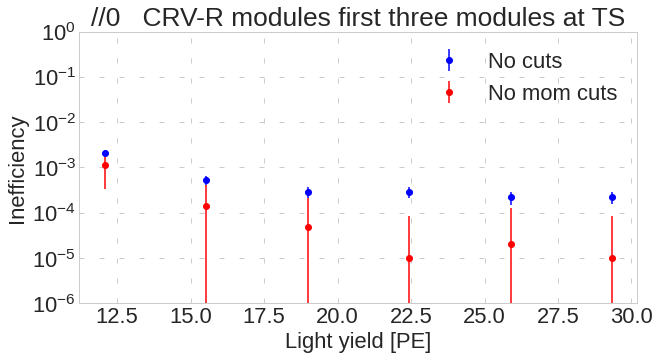

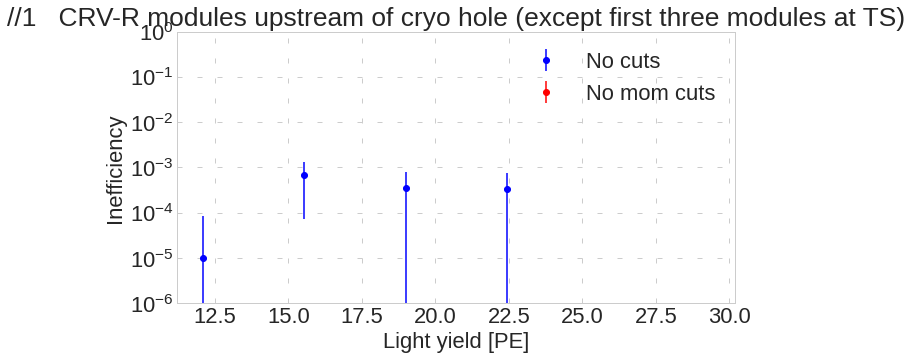

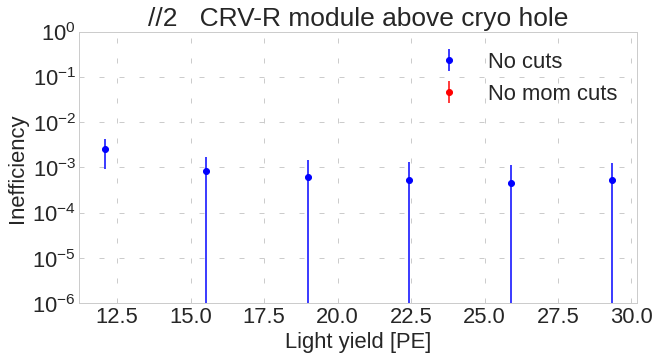

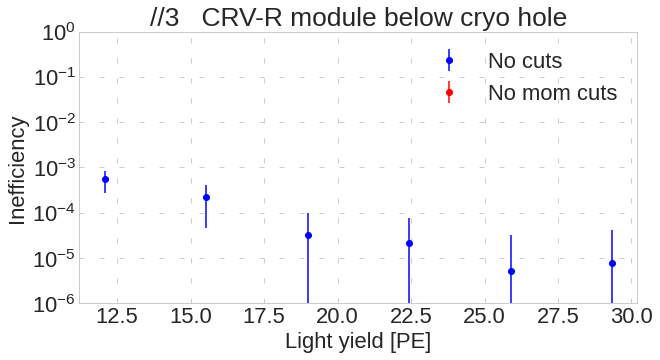

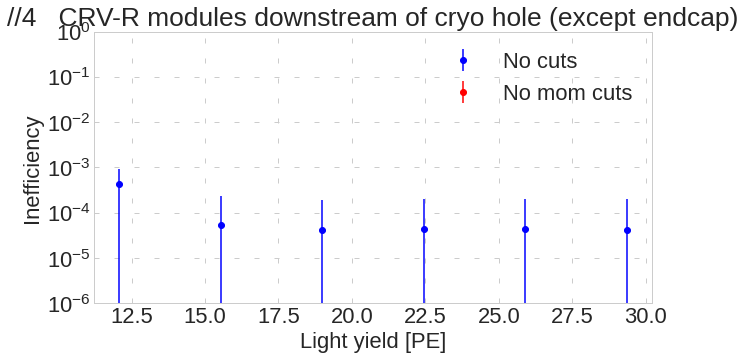

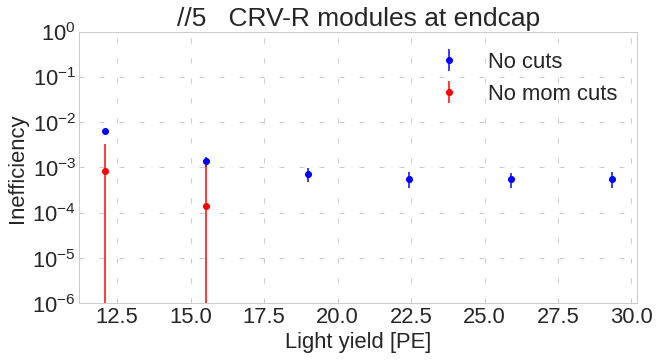

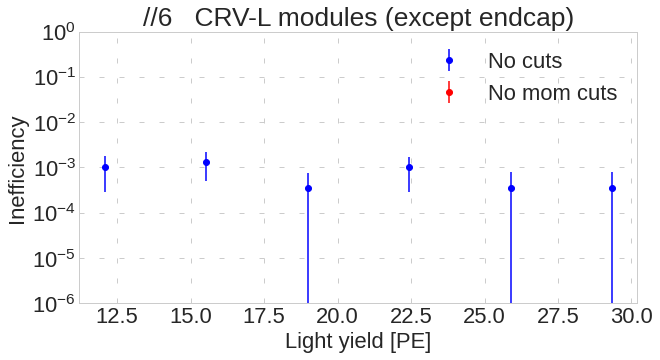

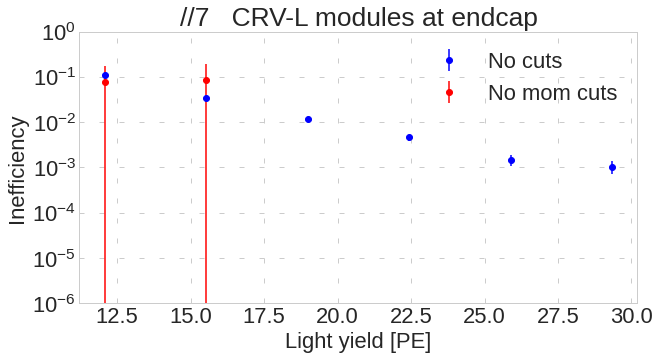

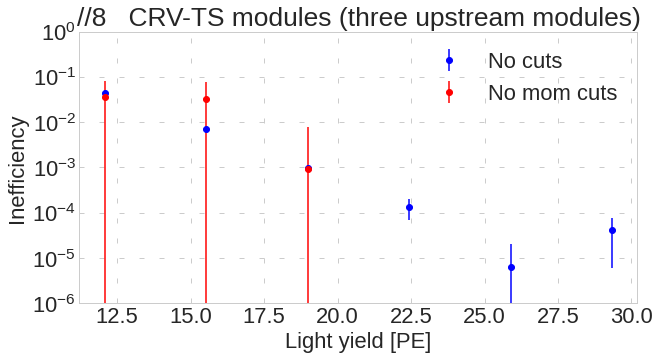

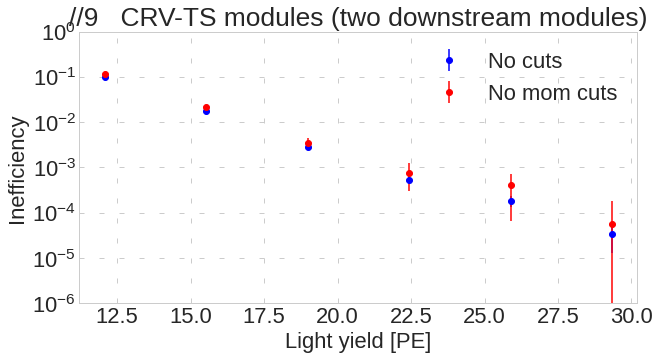

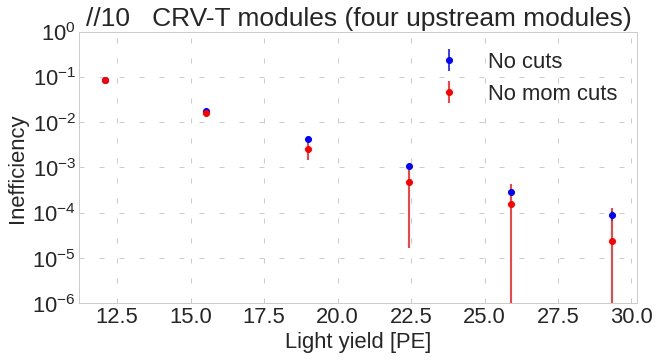

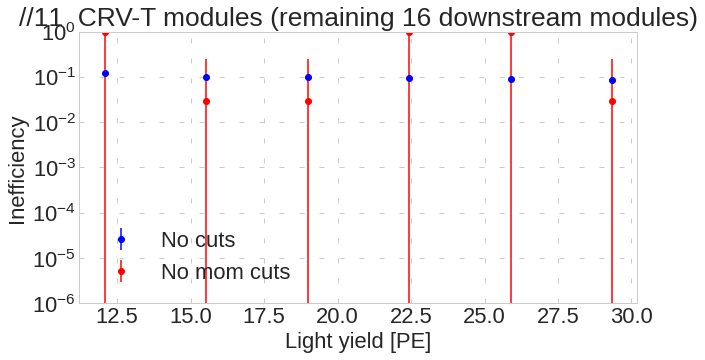

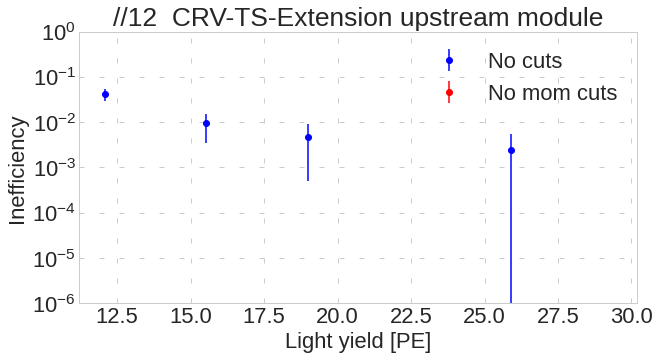

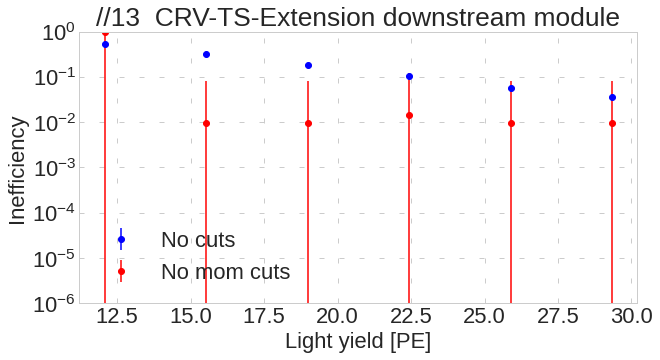

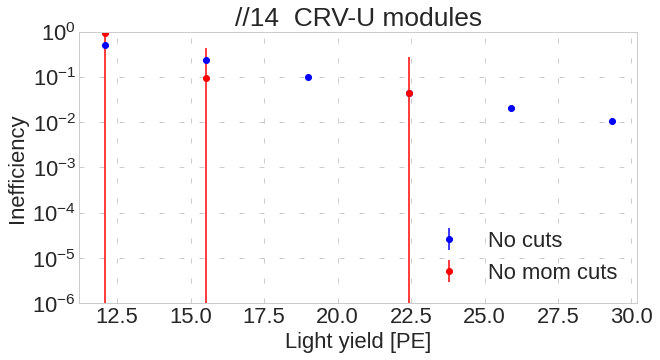

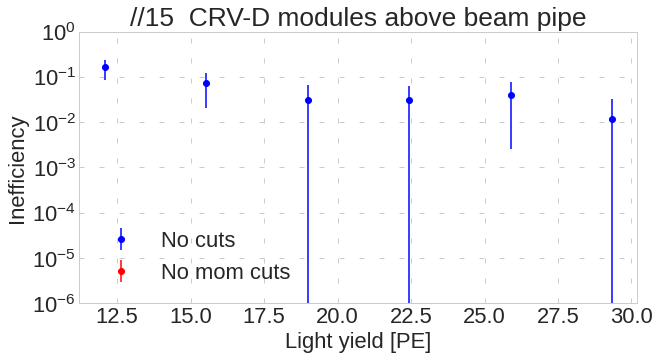

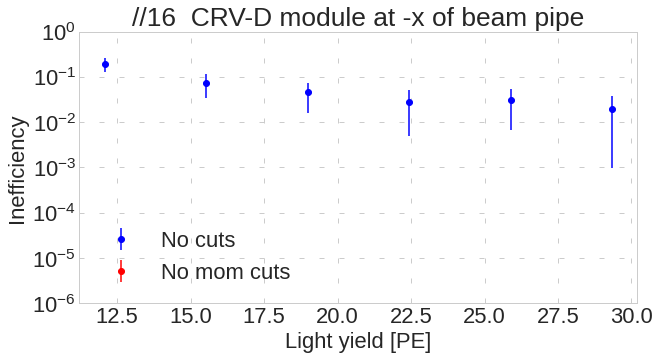

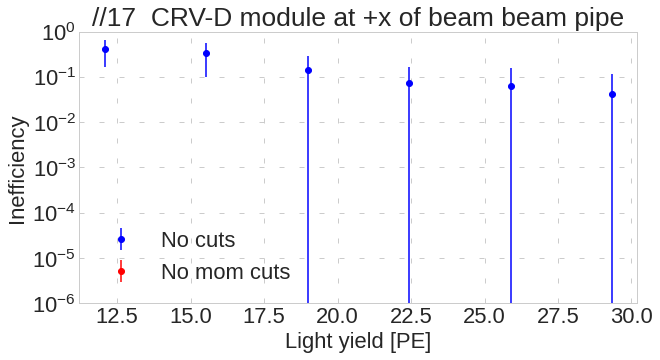

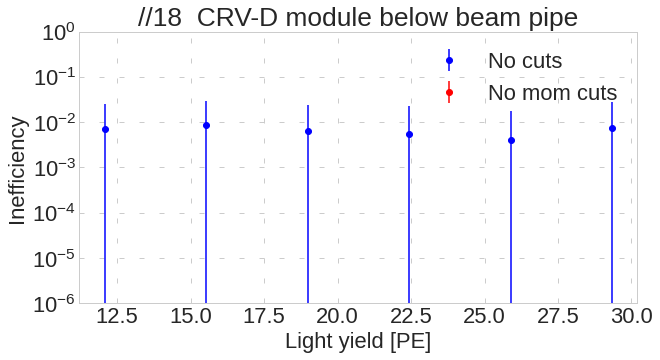

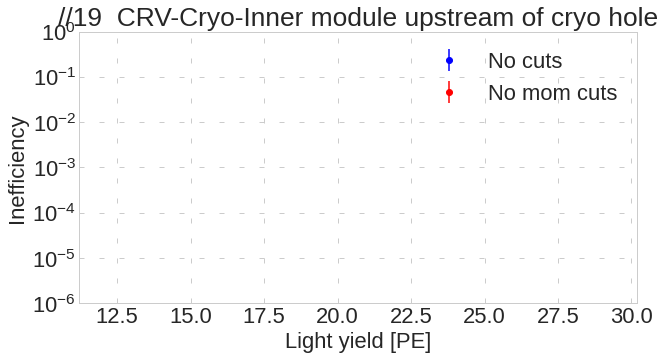

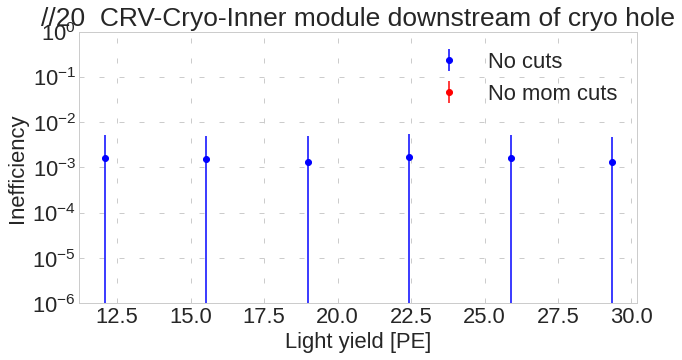

In [ ]:
for crvSectorNumber in range(0,21):
  plt.figure()
  crvSectorName = crvSectorNames[crvSectorNumber]
  df_ = dfIneff.query('crvSectorName==@crvSectorName & cut=="No cuts"')
  plt.errorbar(df_['lyield_arr'], df_['effave_arr'], yerr=df_['efferr_arr'], ls='None', color='Blue', marker='o', label='No cuts')
  df_ = dfIneff.query('crvSectorName==@crvSectorName & cut=="No mom cut"')
  plt.errorbar(df_['lyield_arr'], df_['effave_arr'], yerr=df_['efferr_arr'], ls='None', color='Red', marker='o', label='No mom cuts')

  plt.title(utils.CRV_SECTOR_NAMES[crvSectorName])
  plt.yscale('log')
  plt.xlabel('Light yield [PE]')
  plt.ylabel('Inefficiency')
  plt.ylim(1e-6, 1)
  plt.locator_params(axis="y", numticks=10)
  plt.legend()